# California Housing Prices
Median house prices for California districts derived from the 1990 census.

Context:

* This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

* The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

Content:

* The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

    longitude

    latitude

    housing_median_age

    total_rooms

    total_bedrooms

    population

    households

    median_income

    median_house_value

    ocean_proximity

Acknowledgements
This data was initially featured in the following paper:
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

and I encountered it in 'Hands-On Machine learning with Scikit-Learn and TensorFlow' by Aurélien Géron.
Aurélien Géron wrote:
This dataset is a modified version of the California Housing dataset available from:
Luís Torgo's page (University of Porto)

We're going to predict the median house value for California districts using diffrent regression models such as Linear Regression, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor, and Support Vector Regressor.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Path wiht the data
datapath = './Data/housing.csv'

In [3]:
data = pd.read_csv(datapath)

## Exploratory Data Analysis

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* There are 9 columns with numerical data and 1 column with categorical data, all with a total of 20640 records, except for the total_bedrooms column which has 20433 records.

We can see more details about the dataset using the value_counts() and the describe() method.

In [6]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We see that the values of the columns are very different from each other, so normalizing the data would be useful for a machine learning model.

Another thing we notice is that there are some outliers, for example the total rooms has a maximum value of 39320, while 75% of the data is below 3148.0, which indicates that there are values that are much higher than the average.

Also we can see that the median income isn't expressed in dollars because the values are between 0.5 and 15 and it could be the median income in termos of thousands of dollars.

First let's check for missing values in the dataset.

In [8]:
data.isnull().sum().sort_values(ascending=False)

total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

There are only missing values in the total_bedrooms. We are going to make the treatment of these missing values later. Now we have to create a test set and a training set. Before we need to split the data intelligently, because if we split the data randomly, we may have a test set that is not representative of the training set. For example, if we split the data randomly, we may have a test set with only expensive houses, while the training set has only cheap houses. To avoid this, we can use stratified sampling, which consists of dividing the data into homogeneous subgroups and then splitting the data in such a way that the test set is representative of the training set.

In [9]:
traindata, testdata = train_test_split(data, test_size=0.2, random_state=42)

In [10]:
data["income_cat"] = pd.cut(data["median_income"], 
                            bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
                            labels=[1, 2, 3, 4, 5])

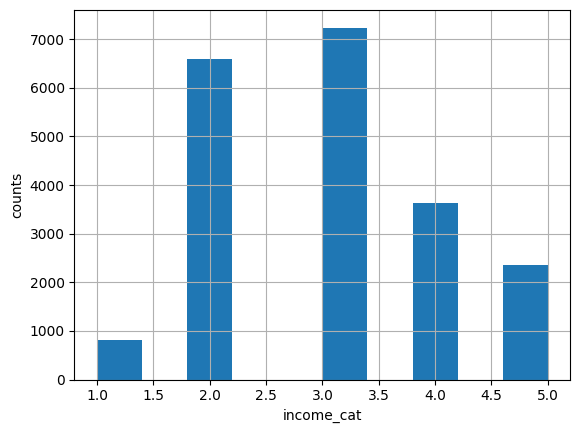

In [11]:
data['income_cat'].hist()
plt.xlabel('income_cat')
plt.ylabel('counts')
plt.show()

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [13]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [14]:
for train_index, test_index in split.split(data, data["income_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

Let's see the proportion of the income categories in the splits.

In [15]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(data),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


The values are very similar, which is good, but random sampling has more variability, so we can use stratified sampling to make the data more consistent. Now we can drop the income_cat column because we don't need it anymore.

In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

Let's do this in a function so we can use it later.

In [17]:
def stratified_sampling(data, test_size=0.2, random_state=42):
    """Function that performs stratified sampling on the data
    
    Args : 
        data (pd.DataFrame) : the data to be sampled

    Returns : 
        strat_train_set (pd.DataFrame) : the stratified training set
        strat_test_set (pd.DataFrame) : the stratified testing set    
    """

    data["income_cat"] = pd.cut(data["median_income"], 
                            bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
                            labels=[1, 2, 3, 4, 5])
    
    split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
    for train_index, test_index in split.split(data, data["income_cat"]):
        strat_train_set = data.loc[train_index]
        strat_test_set = data.loc[test_index]
    for set_ in (strat_train_set, strat_test_set):
        set_.drop("income_cat", axis=1, inplace=True)
    return strat_train_set, strat_test_set

Another thing that we can do is to plot the data to see if there are any insights that we can get from it. Taking advantage that we have the latitude and longitude columns, we can plot the data of the districts on a scatter plot. Also we can use the median_house_value to color the points and the population to size the points.

In [18]:
import os
import urllib
# Download the California image
images_path = os.path.join("images")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('images\\california.png', <http.client.HTTPMessage at 0x198db85d690>)

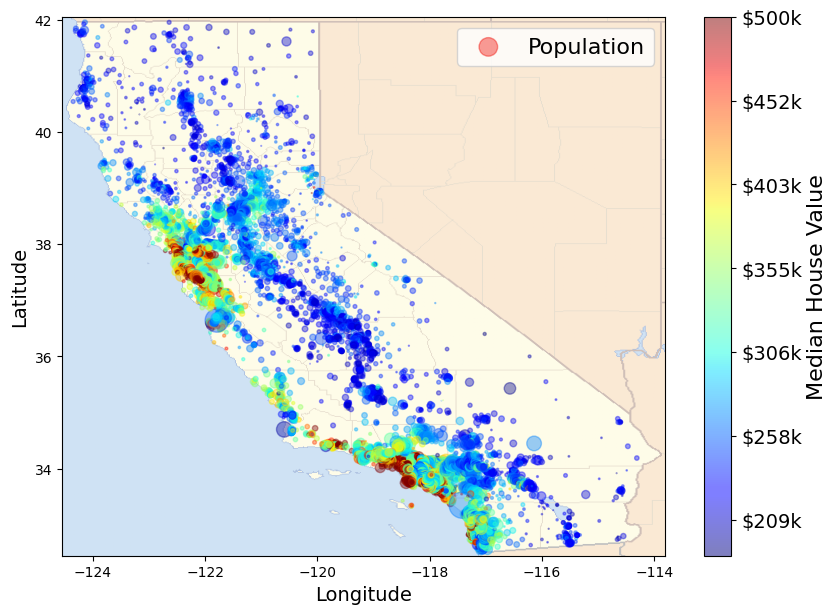

In [19]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = data.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=data['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = data["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

From this plot we get that the housing prices are very related to the location, near the ocean the prices are higher, and the population is also related to the location, the points are more concentrated in the lower left corner of the plot.

Now let's do the data cleaning. We are going to fill the missing values in the total_bedrooms checking the correlation between the total_bedrooms and the total_rooms, households and population columns. Those values are also on the test set so in this case we are avoiding data leakage. Lets search for correlations between the columns, that will help us not to just fill the missing values in a inteligent way, but also to see what columns are more related to the median house value.

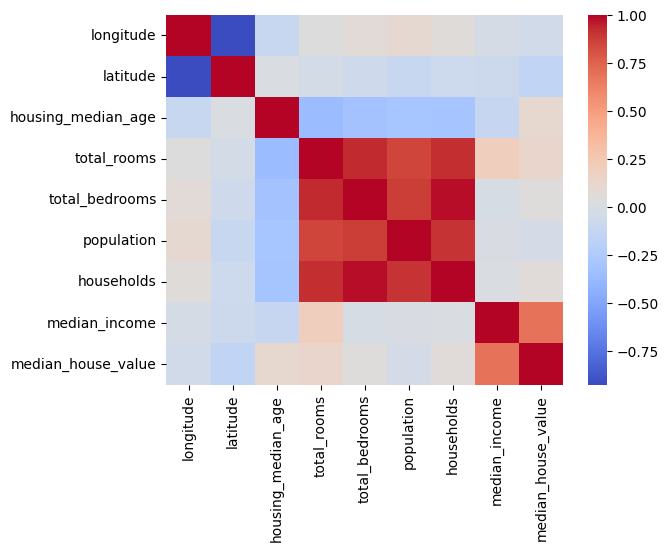

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [20]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
corr = data[numeric_columns].corr()

sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.show()
corr

To fill the values of the total_bedrooms column we are going to use a very simple model of linear regression using the three more correlated columns with the total_bedrooms column.

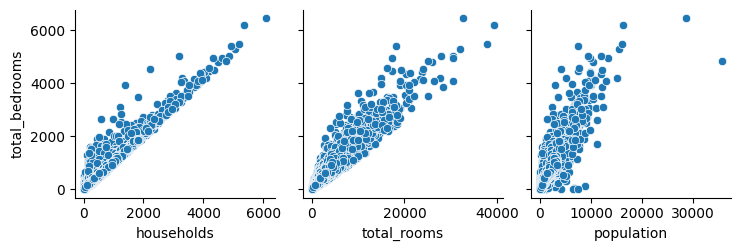

In [21]:
sns.pairplot(data=data, x_vars=['households', 'total_rooms', 'population'], y_vars=['total_bedrooms'])
plt.show()

In [22]:
from sklearn import linear_model

X = data[['households', 'total_rooms', 'population']]
y = data['total_bedrooms']

reg = linear_model.LinearRegression()

nan_index = y[y.isna()].index

X_fit = X.drop(nan_index)
y.dropna(inplace=True)

reg.fit(X_fit, y)

print('R-squared: \n', reg.score(X_fit, y))

X_pred = X.loc[nan_index]
y_pred = np.round(reg.predict(X_pred))

data.loc[nan_index, 'total_bedrooms'] = y_pred

data.isnull().sum().sort_values(ascending=False)

R-squared: 
 0.9670674510465973


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
income_cat            0
dtype: int64

Now we don't have any missing values in the dataset.

### Searching for Correlations

Now we are going to check the correlation between the median house value and the other columns.

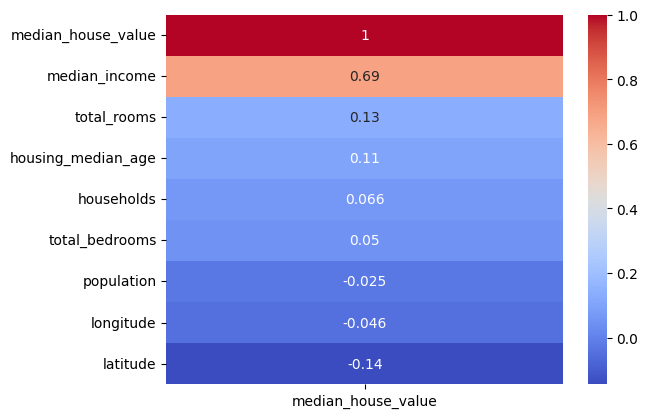

In [23]:
sns.heatmap(corr[['median_house_value']].sort_values(by='median_house_value', ascending=False), cmap='coolwarm', annot=True)
plt.show()

One last thing you may want to do before actually preparing the data for Machine
Learning algorithms is to try out various attribute combinations. For example, the
total number of rooms in a district is not very useful if you don’t know how many
households there are. What you really want is the number of rooms per household.
Similarly, the total number of bedrooms by itself is not very useful: you probably
want to compare it to the number of rooms. And the population per household also
seems like an interesting attribute combination to look at. Let’s create these new
attributes:

In [24]:
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']

Let's see the correlation matrix again

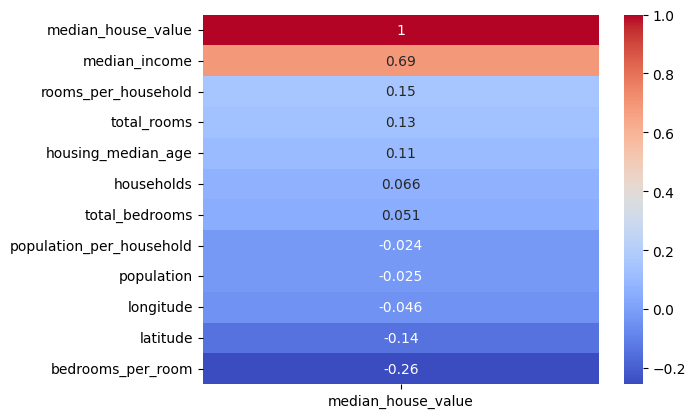

In [25]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
corr = data[numeric_columns].corr()
sns.heatmap(corr[['median_house_value']].sort_values(by='median_house_value', ascending=False), cmap='coolwarm', annot=True)
plt.show()

This is intresting because we have created new columns that are more correlated with the median house value than the original columns. Now, before to prepare the data for the machine learning models, we have to take care about the categorical data. We are going to use the one hot encoding technique to transform the ocean_proximity column into numerical data.

In [26]:
from sklearn.preprocessing import OneHotEncoder

categories = data[['ocean_proximity']]

cat_encoder = OneHotEncoder()

categories_1hot = cat_encoder.fit_transform(categories)

print(categories_1hot.toarray())
print(cat_encoder.categories_)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


We can also use custom transformations to perform tasks such as custom cleanup operations or combining specific attributes. We can create a class and implement the fit(), transform() and fit_transform() methods. We can also add the hyperparameters to the class to make it easier to change them later.

In [27]:
data = pd.read_csv(datapath)

In [28]:
data.isna().sum().sort_values(ascending=False)

total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

The way that the book suggests to do this is to create a class that inherits from the BaseEstimator and the TransformerMixin classes. This way we can use the get_params() and set_params() methods to get and set the hyperparameters of the class. The only thing that I don't like about this is that is created to useit with data.values, but I think that is better to use it with pandas dataframes.

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        self.rooms_ix = None
        self.bedrooms_ix = None
        self.population_ix = None
        self.households_ix = None
    def fit(self, X, y=None):
        self.rooms_ix, self.bedrooms_ix, self.population_ix, self.households_ix = [
            list(data.columns).index(col)
            for col in ("total_rooms", "total_bedrooms", "population", "households")]
        return self # nothing else to do
    def transform(self, X, y=None):
        X = X.values
        rooms_per_household = X[:, self.rooms_ix] / X[:, self.households_ix]
        population_per_household = X[:, self.population_ix] / X[:, self.households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, self.bedrooms_ix] / X[:, self.rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In this example the transformer has one hyperparameter, add_bedrooms_per_room, set to True by default. This hyperparameter will allow us to easily find out whether adding this attribute helps the Machine Learning algorithms or not. More generally, you can add a hyperparameter to gate any data preparation step that you are not 100% sure about. The more you automate these data preparation steps, the more combinations you can automatically try out, making it much more likely that you will find a great combination (and saving you a lot of time).

Knowing this we now can create a class to perform the fill of the total bedrooms too.

In [30]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression

class FillTotalBedrooms(BaseEstimator, TransformerMixin):
    """Class to fill the missing values in 'total_bedrooms' using a linear regression model.
    
    The model is trained using the columns 'households', 'total_rooms', and 'population'.

    Attributes:
        model: The linear regression model.
        nan_index: The index of the rows with NaN in 'total_bedrooms'.
    """

    def __init__(self):
        self.model = LinearRegression()
        self.nan_index = None

    def fit(self, X, y=None):
        """Fit the linear regression model.
        
        Args:
            X: The input data.
            y: Ignored.
        
        Returns:
            self: The object itself.
        """

        # Select relevant columns
        self.X = X[['households', 'total_rooms', 'population']]
        self.y = X['total_bedrooms']
        
        # Find the rows with NaN in 'total_bedrooms'
        self.nan_index = self.y[self.y.isna()].index
        
        # Prepare the data for fitting
        X_fit = self.X.drop(self.nan_index)
        y_fit = self.y.dropna()
        
        if len(y_fit) == 0:
            return self

        # Fit the regression model
        self.model.fit(X_fit, y_fit)

        return self

    def transform(self, X):
        """Fill the missing values in 'total_bedrooms' using the trained model.
        
        Args:
            X: The input data.
        
        Returns:
            X_transformed: The data with the missing values filled.
        """
        # Select relevant columns
        X_transformed = X.copy()
        
        if len(self.nan_index) == 0:
            return X_transformed

        # Predict the missing values
        X_pred = self.X.loc[self.nan_index]
        y_pred = np.round(self.model.predict(X_pred))
        
        # Fill the missing values in the original dataframe
        X_transformed.loc[self.nan_index, 'total_bedrooms'] = y_pred
        
        return X_transformed

Now following the example of the book we can create a pipeline to perform all the transformations for the data. We first create the pipeline for the numerical data and then we create a full pipeline to transform the data. Also as we said before we have to normalize the data because the values are very different from each other. For this we can use the StandardScaler class from scikit-learn.

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline for numerical attributes
num_pipeline = Pipeline([
    ('fill_total_bedrooms', FillTotalBedrooms()),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

# The elements of the pipeline are a list of tuples, where the first element is the name of the step and the second element is the estimator object.

When you call the pipeline’s fit() method, it calls fit_transform() sequentially on
all transformers, passing the output of each call as the parameter to the next call, until
it reaches the final estimator, for which it just calls the fit() method.

Now to take care about the categorical data we can use the ColumnTransformer class from scikit-learn. This class allows us to apply different transformations to different columns. In this case we are going to apply the one hot encoding to the ocean_proximity column.

In [32]:
from sklearn.compose import ColumnTransformer

# Get the numerical columns
num_attribs = list(data.select_dtypes(include=[np.number]).columns)
num_attribs.remove('median_house_value')
cat_attribs = ['ocean_proximity']

# Full pipeline
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

# Apply the full pipeline
data_prepared = full_pipeline.fit_transform(data)

Now we have the data prepared for the machine learning models. As we can see the data comes as a numpy array, but we can convert it to a pandas dataframe to make the lasts checks before to train the models and visualize if something is wrong.

In [33]:
data_prepared_df = pd.DataFrame(data_prepared, columns=num_attribs + ['rooms_per_household', 'population_per_household', 'bedrooms_per_room'] + list(cat_encoder.categories_[0]))

In [34]:
data_prepared_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.970899,-0.974429,-0.977033,2.344766,0.628559,-0.049597,-1.148148,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.348762,0.861439,1.669961,2.332238,0.327041,-0.092512,-0.989198,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.826069,-0.820777,-0.843637,1.782699,1.155620,-0.025843,-1.442971,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719227,-0.766028,-0.733781,0.932968,0.156966,-0.050329,-0.494310,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612385,-0.759847,-0.629157,-0.012881,0.344711,-0.085616,-0.707767,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.389203,-0.512592,-0.443449,-1.216128,-0.155023,-0.049110,0.199219,0.0,1.0,0.0,0.0,0.0
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.921040,-0.944405,-1.008420,-0.691593,0.276881,0.005021,0.036628,0.0,1.0,0.0,0.0,0.0
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.125659,-0.369537,-0.174042,-1.142593,-0.090318,-0.071735,0.036023,0.0,1.0,0.0,0.0,0.0
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.306104,-0.604429,-0.393753,-1.054583,-0.040211,-0.091225,0.117512,0.0,1.0,0.0,0.0,0.0


There are no missing values and the data is normalized. Now we can split the data into a training set and a test set and train the models.

Before to train the models let's split the data into a training set and a test set with the stratified sampling that we have created before.

In [35]:
train_set, test_set = stratified_sampling(data, test_size=0.2, random_state=42)

y_train = train_set['median_house_value']
X_train = train_set.drop('median_house_value', axis=1)

y_test = test_set['median_house_value']
X_test = test_set.drop('median_house_value', axis=1)

In [36]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.fit_transform(X_test)

Let's see the histogram of the median house value in train

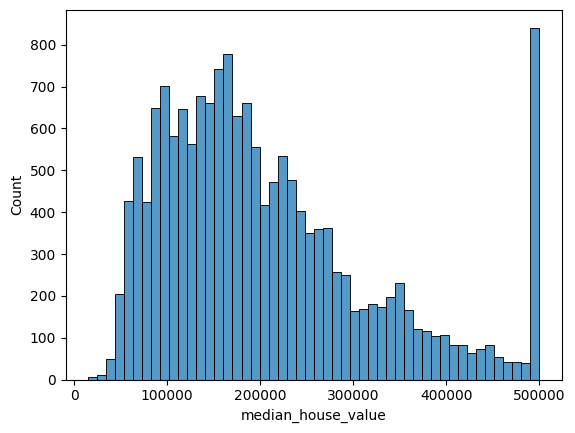

In [37]:
sns.histplot(y_train, bins=50)
plt.show()

## Linear Regression

The linear regression is the simplest model that we can use to predict the median house value. The linear regression model makes a prediction by computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term). We already used the linear regression model to fill the missing values in the total_bedrooms column, now we are going to use it to predict the median house value.

In [40]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

LinearRegression()

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

housing_predictions = lin_reg.predict(X_train_prepared)
lin_mse = mean_squared_error(y_train, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(y_train, housing_predictions)

print('RMSE of train:', lin_rmse)
print('MAE of train: ', lin_mae)

RMSE of train: 68136.57101505985
MAE of train:  49023.42110894705


We have a MAE of 49023 dollars, which is not very good, but it is a start, we don't have any hyperparameter to tune in this model, so we can try another model to see if we can get a better result. Also we can test the model performance withouth using the test set by using a validation technique called cross-validation.

In [42]:
from sklearn.model_selection import cross_val_score

scores_lin = cross_val_score(lin_reg, X_train_prepared, y_train, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-scores_lin)

def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

display_scores(lin_rmse_scores)

Scores: [71152.27858271 63797.60966343 67668.56680878 68200.62279726
 66718.94968921 72248.42425565 69922.59160724 68452.06893947
 65947.2244939  70055.3110369 ]
Mean: 68416.36478745562
Standard deviation: 2409.202357929722


K fold cross-validation randomly splits the training set into K distinct subsets called folds, then it trains and evaluates the model K times, picking a different fold for evaluation every time and training on the other K-1 folds. The result is an array containing the K evaluation scores. Now we have a better estimate of the performance of the model withouth using a validation set in particular.

## Support Vector Machine for Regression

(Classification is the default task of the Support Vector Machine, but it can also be used for regression)
The Support Vector Machine for Regression is a powerful model that can be used to predict the median house value. The objective of the Support Vector Machine for Regression is to fit the largest possible "street" between the data. In other words, the goal is to make the margin as large as possible while limiting the margin violations.

SVM is sensitive to the scale of the input features.

Also since the SVM can be linear or non-linear, we can use the kernel trick to make the model non-linear. The kernel trick is a mathematical technique that implicitly maps instances into a very high-dimensional space, enabling nonlinear classification and regression with Support Vector Machines.

Since we are going to use SVM for regression the idea is the same, but instead of trying to fit the largest possible street between two classes, the SVM for regression tries to fit as many instances as possible on the street while limiting margin violations (instances off the street). The width of the street is controlled by a hyperparameter ε.

Here also traninig with the logarithm of the median house value we have a better result than training with the original values.

In [47]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='poly', degree=2, C=0.1, epsilon=0.1)
svm_reg.fit(X_train_prepared, np.log1p(y_train))

SVR(C=0.1, kernel='poly')

In [48]:
housing_predictions = svm_reg.predict(X_train_prepared)
svm_mse = mean_squared_error(y_train, np.expm1(housing_predictions))
svm_rmse = np.sqrt(svm_mse)
svm_mae = mean_absolute_error(y_train, np.expm1(housing_predictions))

print('RMSE of train:', svm_rmse)
print('MAE of train: ', svm_mae)

RMSE of train: 73211.14156953647
MAE of train:  48456.15062598876


Let's fine tune the model using GridSearchCV. The GridSearchCV class allows us to search for the best combination of hyperparameters for the model. We can pass a dictionary with the hyperparameters that we want to test and the GridSearchCV class will test all the combinations of hyperparameters and return the best combination.

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel' : ['poly'], 'degree' : [2, 3, 4], 'C' : [0.1, 1, 10], 'epsilon' : [0.1, 1, 10]}
]

svm_reg = SVR()

grid_search_svm = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', 
                               return_train_score=True)

grid_search_svm.fit(X_train_prepared, np.log1p(y_train))

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                          'epsilon': [0.1, 1, 10], 'kernel': ['poly']}],
             return_train_score=True, scoring='neg_mean_squared_error')

We extract the best parameters and the best estimator from the grid search and we can use them to make the predictions.

In [51]:
grid_search_svm.best_params_

{'C': 0.1, 'degree': 2, 'epsilon': 0.1, 'kernel': 'poly'}

{'C': 0.1, 'degree': 2, 'epsilon': 0.1, 'kernel': 'poly'}

In [52]:
cvres = grid_search_svm.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

0.3221560571920548 {'C': 0.1, 'degree': 2, 'epsilon': 0.1, 'kernel': 'poly'}
0.497014470801142 {'C': 0.1, 'degree': 2, 'epsilon': 1, 'kernel': 'poly'}
0.9146753965439595 {'C': 0.1, 'degree': 2, 'epsilon': 10, 'kernel': 'poly'}
1.2067196058875886 {'C': 0.1, 'degree': 3, 'epsilon': 0.1, 'kernel': 'poly'}
0.549401593151951 {'C': 0.1, 'degree': 3, 'epsilon': 1, 'kernel': 'poly'}
0.9146753965439595 {'C': 0.1, 'degree': 3, 'epsilon': 10, 'kernel': 'poly'}
11.743679020589163 {'C': 0.1, 'degree': 4, 'epsilon': 0.1, 'kernel': 'poly'}
2.386334527768164 {'C': 0.1, 'degree': 4, 'epsilon': 1, 'kernel': 'poly'}
0.9146753965439595 {'C': 0.1, 'degree': 4, 'epsilon': 10, 'kernel': 'poly'}
0.6268726866910329 {'C': 1, 'degree': 2, 'epsilon': 0.1, 'kernel': 'poly'}
0.46934561881960446 {'C': 1, 'degree': 2, 'epsilon': 1, 'kernel': 'poly'}
0.9146753965439595 {'C': 1, 'degree': 2, 'epsilon': 10, 'kernel': 'poly'}
2.296362056464105 {'C': 1, 'degree': 3, 'epsilon': 0.1, 'kernel': 'poly'}
2.117391379729743 {'C'

0.3221560571920548 {'C': 0.1, 'degree': 2, 'epsilon': 0.1, 'kernel': 'poly'},

0.497014470801142 {'C': 0.1, 'degree': 2, 'epsilon': 1, 'kernel': 'poly'},

0.9146753965439595 {'C': 0.1, 'degree': 2, 'epsilon': 10, 'kernel': 'poly'},

1.2067196058875886 {'C': 0.1, 'degree': 3, 'epsilon': 0.1, 'kernel': 'poly'},

0.549401593151951 {'C': 0.1, 'degree': 3, 'epsilon': 1, 'kernel': 'poly'},

0.9146753965439595 {'C': 0.1, 'degree': 3, 'epsilon': 10, 'kernel': 'poly'},

11.743679020589163 {'C': 0.1, 'degree': 4, 'epsilon': 0.1, 'kernel': 'poly'},

2.386334527768164 {'C': 0.1, 'degree': 4, 'epsilon': 1, 'kernel': 'poly'},

0.9146753965439595 {'C': 0.1, 'degree': 4, 'epsilon': 10, 'kernel': 'poly'},

0.6268726866910329 {'C': 1, 'degree': 2, 'epsilon': 0.1, 'kernel': 'poly'},

0.46934561881960446 {'C': 1, 'degree': 2, 'epsilon': 1, 'kernel': 'poly'},

0.9146753965439595 {'C': 1, 'degree': 2, 'epsilon': 10, 'kernel': 'poly'},

2.296362056464105 {'C': 1, 'degree': 3, 'epsilon': 0.1, 'kernel': 'poly'},

2.117391379729743 {'C': 1, 'degree': 3, 'epsilon': 1, 'kernel': 'poly'},

0.9146753965439595 {'C': 1, 'degree': 3, 'epsilon': 10, 'kernel': 'poly'},

29.490991397424793 {'C': 1, 'degree': 4, 'epsilon': 0.1, 'kernel': 'poly'},

19.042255840011332 {'C': 1, 'degree': 4, 'epsilon': 1, 'kernel': 'poly'},

0.9146753965439595 {'C': 1, 'degree': 4, 'epsilon': 10, 'kernel': 'poly'},

1.0503752579526022 {'C': 10, 'degree': 2, 'epsilon': 0.1, 'kernel': 'poly'},

0.5074206372788536 {'C': 10, 'degree': 2, 'epsilon': 1, 'kernel': 'poly'},

0.9146753965439595 {'C': 10, 'degree': 2, 'epsilon': 10, 'kernel': 'poly'},

14.604505043649791 {'C': 10, 'degree': 3, 'epsilon': 0.1, 'kernel': 'poly'},

3.4641461072755377 {'C': 10, 'degree': 3, 'epsilon': 1, 'kernel': 'poly'},

0.9146753965439595 {'C': 10, 'degree': 3, 'epsilon': 10, 'kernel': 'poly'},

220.0120598896294 {'C': 10, 'degree': 4, 'epsilon': 0.1, 'kernel': 'poly'},

19.986378347030353 {'C': 10, 'degree': 4, 'epsilon': 1, 'kernel': 'poly'},

0.9146753965439595 {'C': 10, 'degree': 4, 'epsilon': 10, 'kernel': 'poly'},

In [57]:
best_svm = grid_search_svm.best_estimator_

housing_predictions = best_svm.predict(X_train_prepared)

svm_mse = mean_squared_error(y_train, np.expm1(housing_predictions))
svm_rmse = np.sqrt(svm_mse)
svm_mae = mean_absolute_error(y_train, np.expm1(housing_predictions))

print('RMSE of train:', svm_rmse)
print('MAE of train: ', svm_mae)


RMSE of train: 65531.05257250801
MAE of train:  43861.627746146245


RMSE of train: 65531.05257250801

MAE of train:  43861.627746146245

We got a worse result than the linear regression model, but we can try another model to see if we can get a better result.

## Tree ensemble methods

First we are going to use the Decision Tree Regressor. The Decision Tree Regressor is a powerful model that can be used to predict the median house value. The Decision Tree Regressor makes a prediction by asking a series of questions about the data. The objective of the Decision Tree Regressor is to split the data in such a way that the variance of the target variable is minimized.

In [44]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_prepared, y_train)

DecisionTreeRegressor()

In [45]:
tree_mse = mean_squared_error(y_train, tree_reg.predict(X_train_prepared))
tree_rmse = np.sqrt(tree_mse)
tree_mae = mean_absolute_error(y_train, tree_reg.predict(X_train_prepared))

print('RMSE of train:', tree_rmse)
print('MAE of train: ', tree_mae)

RMSE of train: 0.0
MAE of train:  0.0


Having 0 error is a clear sign of overfitting, so we can use the cross-validation technique to have a better estimate of the performance of the model.

In [46]:
scores = cross_val_score(tree_reg, X_train_prepared, y_train, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [73336.15590962 70340.35062172 67904.29392832 72722.50661121
 68445.60997208 75453.10661309 72004.36846681 71940.30958866
 68057.31563846 70265.43343259]
Mean: 71046.94507825692
Standard deviation: 2363.644067874446


The Decision Tree Regressor has a RMSE of 71368.0 dollars, which is worse than the linear regression model. We now can try to use the Random Forest Regressor to see if we can get a better result.

A random forest is a collection of decision trees, where each tree is slightly different from the others. The idea behind the random forest is to combine the predictions of many decision trees to get a more accurate and stable prediction.

In [47]:
from sklearn.ensemble import RandomForestRegressor
froest_reg = RandomForestRegressor()
froest_reg.fit(X_train_prepared, y_train)

forest_mse = mean_squared_error(y_train, froest_reg.predict(X_train_prepared))
forest_rmse = np.sqrt(forest_mse)
forest_mae = mean_absolute_error(y_train, froest_reg.predict(X_train_prepared))

print('RMSE of train:', forest_rmse)
print('MAE of train: ', forest_mae)

RMSE of train: 18662.26875650818
MAE of train:  12063.166615794573


The result is much better than the other models, we have a RMSE of 18662.3 dollars, which is the best result so far. We can find optimal hyperparameters for the model using the GridSearchCV class. But in this case we have many hyperparameters to tune, so we can use the RandomizedSearchCV class, which allows us to search for the best hyperparameters by selecting them randomly.

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

rnd_search.fit(X_train_prepared, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000198F17AAB50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000198F17AA090>},
                   random_state=42, scoring='neg_mean_squared_error')

The best hyperparameters found are:

In [50]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [51]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

48993.34368274346 {'max_features': 7, 'n_estimators': 180}
51418.33953398212 {'max_features': 5, 'n_estimators': 15}
50466.18213441532 {'max_features': 3, 'n_estimators': 72}
50858.107167865885 {'max_features': 5, 'n_estimators': 21}
49067.59184348091 {'max_features': 7, 'n_estimators': 122}
50457.10271307512 {'max_features': 3, 'n_estimators': 75}
50339.56523570408 {'max_features': 3, 'n_estimators': 88}
49459.740457149535 {'max_features': 5, 'n_estimators': 100}
50254.67614078711 {'max_features': 3, 'n_estimators': 150}
64591.51004754871 {'max_features': 5, 'n_estimators': 2}


From the best models and their errors we can often gain good insights on the problem. For example, the Random Forest Regressor can indicate the relative importance of each attribute for making accurate predictions.

In [52]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([7.08232355e-02, 6.30851668e-02, 4.32278142e-02, 1.65656136e-02,
       1.58178741e-02, 1.63028862e-02, 1.50434359e-02, 3.40917491e-01,
       5.76714232e-02, 1.09754805e-01, 7.45072796e-02, 8.06491738e-03,
       1.62092183e-01, 8.17216746e-05, 2.56481898e-03, 3.47933398e-03])

In [53]:
extra_attribs = ['rooms_per_household', 'population_per_household', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3409174910715308, 'median_income'),
 (0.16209218265157826, 'INLAND'),
 (0.1097548051036628, 'population_per_household'),
 (0.07450727959943583, 'bedrooms_per_room'),
 (0.07082323554275124, 'longitude'),
 (0.06308516682959522, 'latitude'),
 (0.05767142323021643, 'rooms_per_household'),
 (0.043227814196624005, 'housing_median_age'),
 (0.016565613632970464, 'total_rooms'),
 (0.016302886200037288, 'population'),
 (0.015817874056657938, 'total_bedrooms'),
 (0.015043435874706985, 'households'),
 (0.008064917379946027, '<1H OCEAN'),
 (0.003479333976199207, 'NEAR OCEAN'),
 (0.0025648189794975178, 'NEAR BAY'),
 (8.17216745900245e-05, 'ISLAND')]

In [55]:
final_model = rnd_search.best_estimator_

rf_mse = mean_squared_error(y_train, final_model.predict(X_train_prepared))
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_train, final_model.predict(X_train_prepared))

print('RMSE of train:', rf_rmse)
print('MAE of train: ', rf_mae)

X_test_prepared = full_pipeline.fit_transform(X_test)

housing_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, housing_predictions)
final_rmse = np.sqrt(final_mse)
final_mae = mean_absolute_error(y_test, housing_predictions)


print('RMSE of test:', final_rmse)
print('MAE of test: ', final_mae)

RMSE of train: 18051.002351185292
MAE of train:  11835.743607679266
RMSE of test: 65972.1146379111
MAE of test:  49034.51821032514
